In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn import metrics
import xgboost as xgb

In [46]:
#Import training and test data
df = pd.read_csv('build/training_data.csv')
lbl = df['label']
df = df.drop(columns='label')

Xtrain,Xtest, ytrain, ytest = train_test_split(df, lbl, test_size = 0.3, random_state = 555)


In [47]:
#Implementing training function with stratifiesKFold
def trainModel(X,y,k = 5):
    skf = StratifiedKFold(n_splits=k, random_state=555, shuffle=True)
    model = []
    for _, (train_index, test_index) in zip(tqdm(range(k)), skf.split(X, y)):
          #print(X.to_numpy())
        bdt = xgb.XGBClassifier(tree_method='hist', random_state=555
                              , early_stopping_rounds=10, eval_metric=["error"]) # create BDT object
        
        bdt.fit(X.to_numpy()[train_index], y.to_numpy()[train_index],
                eval_set=[(X.to_numpy()[test_index], y.to_numpy()[test_index])]);
        model.append(bdt)
    return model

model = trainModel(Xtrain,ytrain, 5)

  0%|                                                     | 0/5 [00:00<?, ?it/s]

[0]	validation_0-error:0.07893
[1]	validation_0-error:0.05929
[2]	validation_0-error:0.05749
[3]	validation_0-error:0.05308
[4]	validation_0-error:0.05068
[5]	validation_0-error:0.04868
[6]	validation_0-error:0.04507
[7]	validation_0-error:0.04367
[8]	validation_0-error:0.04307
[9]	validation_0-error:0.04067
[10]	validation_0-error:0.04046
[11]	validation_0-error:0.04147
[12]	validation_0-error:0.04026
[13]	validation_0-error:0.03846
[14]	validation_0-error:0.03806
[15]	validation_0-error:0.03886
[16]	validation_0-error:0.03866
[17]	validation_0-error:0.03866
[18]	validation_0-error:0.03826
[19]	validation_0-error:0.03806
[20]	validation_0-error:0.03766
[21]	validation_0-error:0.03846
[22]	validation_0-error:0.03746
[23]	validation_0-error:0.03686
[24]	validation_0-error:0.03686
[25]	validation_0-error:0.03686
[26]	validation_0-error:0.03606
[27]	validation_0-error:0.03766
[28]	validation_0-error:0.03726
[29]	validation_0-error:0.03606
[30]	validation_0-error:0.03626
[31]	validation_0-

 20%|█████████                                    | 1/5 [00:02<00:09,  2.28s/it]

[0]	validation_0-error:0.08515
[1]	validation_0-error:0.07173
[2]	validation_0-error:0.06271
[3]	validation_0-error:0.05871
[4]	validation_0-error:0.05470
[5]	validation_0-error:0.05229
[6]	validation_0-error:0.05410
[7]	validation_0-error:0.05209
[8]	validation_0-error:0.05049
[9]	validation_0-error:0.04909
[10]	validation_0-error:0.04769
[11]	validation_0-error:0.04688
[12]	validation_0-error:0.04548
[13]	validation_0-error:0.04428
[14]	validation_0-error:0.04288
[15]	validation_0-error:0.04168
[16]	validation_0-error:0.04228
[17]	validation_0-error:0.04208
[18]	validation_0-error:0.04087
[19]	validation_0-error:0.04067
[20]	validation_0-error:0.04107
[21]	validation_0-error:0.04047
[22]	validation_0-error:0.03987
[23]	validation_0-error:0.04047
[24]	validation_0-error:0.04007
[25]	validation_0-error:0.04007
[26]	validation_0-error:0.03967
[27]	validation_0-error:0.03947
[28]	validation_0-error:0.03927
[29]	validation_0-error:0.03907
[30]	validation_0-error:0.03827
[31]	validation_0-

 40%|██████████████████                           | 2/5 [00:04<00:06,  2.21s/it]

[0]	validation_0-error:0.08195
[1]	validation_0-error:0.06452
[2]	validation_0-error:0.05770
[3]	validation_0-error:0.05009
[4]	validation_0-error:0.04829
[5]	validation_0-error:0.04668
[6]	validation_0-error:0.04328
[7]	validation_0-error:0.04308
[8]	validation_0-error:0.04208
[9]	validation_0-error:0.04027
[10]	validation_0-error:0.04007
[11]	validation_0-error:0.03967
[12]	validation_0-error:0.04027
[13]	validation_0-error:0.03907
[14]	validation_0-error:0.03927
[15]	validation_0-error:0.03827
[16]	validation_0-error:0.03827
[17]	validation_0-error:0.03747
[18]	validation_0-error:0.03707
[19]	validation_0-error:0.03566
[20]	validation_0-error:0.03486
[21]	validation_0-error:0.03606
[22]	validation_0-error:0.03546
[23]	validation_0-error:0.03506
[24]	validation_0-error:0.03386
[25]	validation_0-error:0.03326
[26]	validation_0-error:0.03266
[27]	validation_0-error:0.03286
[28]	validation_0-error:0.03286
[29]	validation_0-error:0.03286
[30]	validation_0-error:0.03386
[31]	validation_0-

 60%|███████████████████████████                  | 3/5 [00:06<00:04,  2.27s/it]

[0]	validation_0-error:0.08095
[1]	validation_0-error:0.06412
[2]	validation_0-error:0.05630
[3]	validation_0-error:0.05510
[4]	validation_0-error:0.04789
[5]	validation_0-error:0.04648
[6]	validation_0-error:0.04648
[7]	validation_0-error:0.04548
[8]	validation_0-error:0.04428
[9]	validation_0-error:0.04328
[10]	validation_0-error:0.04348
[11]	validation_0-error:0.04107
[12]	validation_0-error:0.03987
[13]	validation_0-error:0.04027
[14]	validation_0-error:0.04007
[15]	validation_0-error:0.03907
[16]	validation_0-error:0.03787
[17]	validation_0-error:0.03907
[18]	validation_0-error:0.03807
[19]	validation_0-error:0.03807
[20]	validation_0-error:0.03807
[21]	validation_0-error:0.03747
[22]	validation_0-error:0.03767
[23]	validation_0-error:0.03707
[24]	validation_0-error:0.03707
[25]	validation_0-error:0.03667
[26]	validation_0-error:0.03606
[27]	validation_0-error:0.03627
[28]	validation_0-error:0.03627
[29]	validation_0-error:0.03667
[30]	validation_0-error:0.03667
[31]	validation_0-

 80%|████████████████████████████████████         | 4/5 [00:09<00:02,  2.52s/it]

[0]	validation_0-error:0.08696
[1]	validation_0-error:0.06652
[2]	validation_0-error:0.05851
[3]	validation_0-error:0.05650
[4]	validation_0-error:0.05310
[5]	validation_0-error:0.04929
[6]	validation_0-error:0.04869
[7]	validation_0-error:0.04749
[8]	validation_0-error:0.04668
[9]	validation_0-error:0.04508
[10]	validation_0-error:0.04468
[11]	validation_0-error:0.04328
[12]	validation_0-error:0.03947
[13]	validation_0-error:0.03967
[14]	validation_0-error:0.03807
[15]	validation_0-error:0.03707
[16]	validation_0-error:0.03546
[17]	validation_0-error:0.03446
[18]	validation_0-error:0.03566
[19]	validation_0-error:0.03606
[20]	validation_0-error:0.03546
[21]	validation_0-error:0.03386
[22]	validation_0-error:0.03426
[23]	validation_0-error:0.03366
[24]	validation_0-error:0.03426
[25]	validation_0-error:0.03406
[26]	validation_0-error:0.03406
[27]	validation_0-error:0.03386
[28]	validation_0-error:0.03366
[29]	validation_0-error:0.03326
[30]	validation_0-error:0.03306
[31]	validation_0-

100%|█████████████████████████████████████████████| 5/5 [00:10<00:00,  2.16s/it]


In [48]:
#Implementing prediction
def predict(model, X):
    res = []
    for m in model:
        res.append(m.predict_proba(X)[:,1])
    return np.mean(res, axis = 0)

ypred = predict(model, Xtest.to_numpy())
ypred

array([1.7113386e-04, 9.9987543e-01, 3.0840333e-03, ..., 9.9679214e-01,
       6.7532402e-01, 9.9990004e-01], dtype=float32)

0.9954933130963176


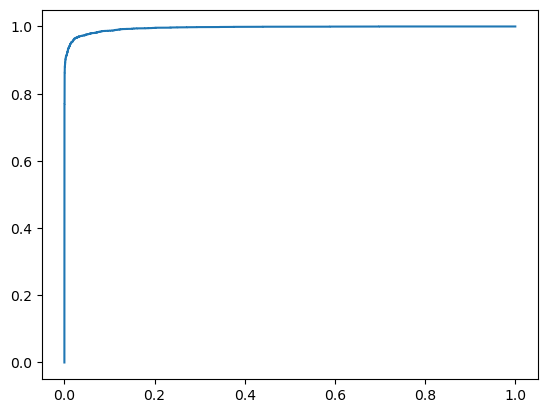

In [49]:
#Calc ROC,AUC curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, ypred)
plt.plot(fpr,tpr);
AUC = metrics.roc_auc_score(ytest, ypred)
print(AUC)

In [50]:
#save ROC,AUC curve to disk
file = open('build/BdtRoc.txt', 'w')
file.write('#fpr tpr\n')
for f, t in zip(fpr, tpr):
    file.write(f'{f} {t}\n')
file.write(f'-1 {AUC}')
file.close()

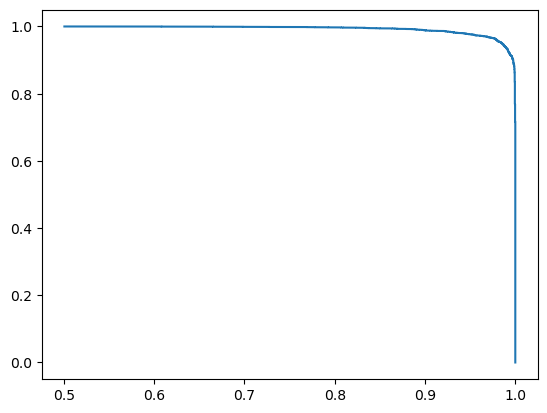

In [51]:
#Calc Precision Recall curve
prec, rec, thresh = metrics.precision_recall_curve(ytest, ypred)

plt.plot(prec, rec)

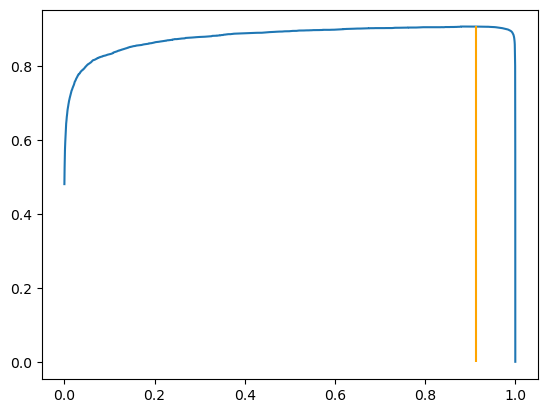

In [52]:
#Find Threshold with fbeta score and classify test data
def fbeta(p, r, beta = 0.1):
    return (1+beta**2)*(p*r)/(beta*p+r)

fb = fbeta(prec, rec)[:-1]
argTr = np.argmax(fb)
plt.plot(thresh, fb)
plt.vlines(tresh[argTr], 0, fb[argTr], color = 'orange', label = 'peak')

threshold = tresh[argTr]
ycls = ypred > threshold
ycls = [1 if i else 0 for i in ycls]

In [53]:
#save ROC,AUC and fbeta curve to disk
file = open('build/BdtPRC.txt', 'w')
file.write('#Precision Recal\n')
for f, t,b in zip(prec[:-1], rec[:-1], fb):
    file.write(f'{f} {t} {b}\n')
file.close()

In [54]:
#save predictions
file = open('build/BdtClassified.txt', 'w')
file.write('#label\n')
for f in ycls:
    file.write(f'{f}\n')
file.close()